In [152]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
computers = pd.read_csv("dataset/computers.csv")
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Units', ylabel='Minutes'>

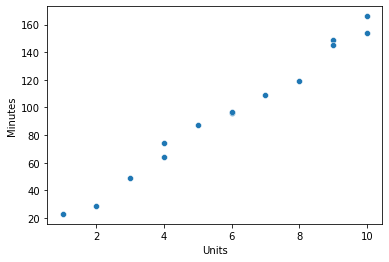

In [153]:
import seaborn as sns
sns.scatterplot(computers['Units'], computers['Minutes'])

Text(0, 0.5, 'Minutes')

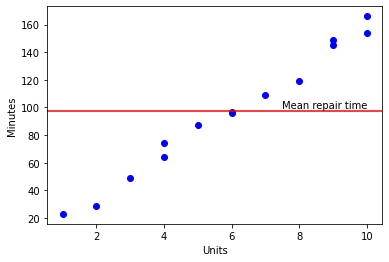

In [154]:
# Calculating the mean.
mean_value = computers['Minutes'].mean()
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

In [155]:
computers['min_model0'] = computers['Minutes'].mean()
computers['min_model1'] = 10 + 12*computers['Units']
computers['min_model2'] = 6 + 18*computers['Units']
computers['min_model3'] = 4.162  + 15.509*computers['Units']

In [156]:
computers

,Units,Minutes,min_model0,min_model1,min_model2,min_model3
0,1,23,97.214286,22,24,19.671
1,2,29,97.214286,34,42,35.180
2,3,49,97.214286,46,60,50.689
3,4,64,97.214286,58,78,66.198
4,4,74,97.214286,58,78,66.198
5,5,87,97.214286,70,96,81.707
6,6,96,97.214286,82,114,97.216
7,6,97,97.214286,82,114,97.216
8,7,109,97.214286,94,132,112.725
9,8,119,97.214286,106,150,128.234


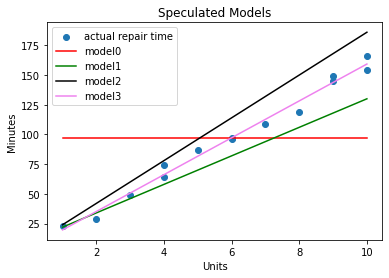

In [157]:
fig,ax = plt.subplots()
# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Plotting the Model0 predictions
ax.plot(computers['Units'],computers['min_model0'],color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(computers['Units'],computers['min_model1'],color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(computers['Units'],computers['min_model2'],color="black",label='model2')

ax.plot(computers['Units'],computers['min_model3'],color="violet",label='model3')

# Adding xlabel, ylabel, title and legend 
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

In [158]:
# Validating Model0: Estimated time = mean('Minutes')
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model0, error in prediction by Model0.
model0_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model0'],
              "Error":(computers['min_model0'] - computers['Minutes'])})
model0_obs # Printing the DataFrame

,Units,Actual time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [159]:
x = computers.Units 
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [160]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model line')

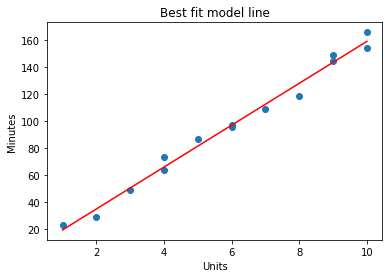

In [161]:
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers) 
# Plotting the target values predicted by the best fit model
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

In [162]:
# Computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":computers.min_best_fit_model - computers.Minutes})
best_fit_model_obs


,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [163]:
sum(best_fit_model_obs.Error**2)

348.848370927318

In [164]:
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]
# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.16165413533831
Coefficients: [15.50877193]


In [165]:
boston = pd.read_csv('dataset/boston_housing.csv')
boston.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39,34.9


C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

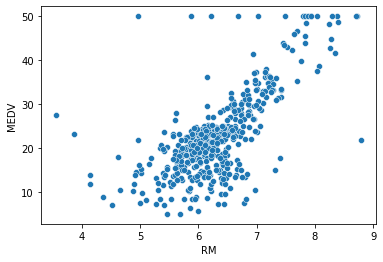

In [166]:
sns.scatterplot(boston['RM'] , boston['MEDV'])

In [167]:
x = pd.DataFrame(boston.iloc[:,5])
x

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [168]:
y = boston['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [169]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state=2)

In [170]:
x_train

,RM
419,6.824
217,6.642
106,5.836
94,6.249
280,7.820
...,...
22,6.142
72,6.065
493,5.707
15,5.834


In [171]:
x_test

,RM
463,6.513
152,5.012
291,7.148
183,6.563
384,4.368
...,...
29,6.674
267,8.297
142,5.403
405,5.683


In [172]:
y_train

419     8.4
217    28.7
106    19.5
94     20.6
280    45.4
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: MEDV, Length: 339, dtype: float64

In [173]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
29     21.0
267    50.0
142    13.4
405     5.0
342    16.5
Name: MEDV, Length: 167, dtype: float64

In [174]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [175]:
lr.fit(x_train, y_train)

LinearRegression()

In [176]:
y_pred = lr.predict(x_test)

In [177]:
lr.intercept_

-29.72900218649541

In [178]:
lr.coef_

array([8.30863137])

In [179]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , y_pred)

38.63468404740148

In [180]:
np.sqrt(mean_squared_error(y_test , y_pred))

6.215680497532147

In [181]:
# read the data from input csv file
delivery = pd.read_csv("dataset/delivery.csv")
# view sample data
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


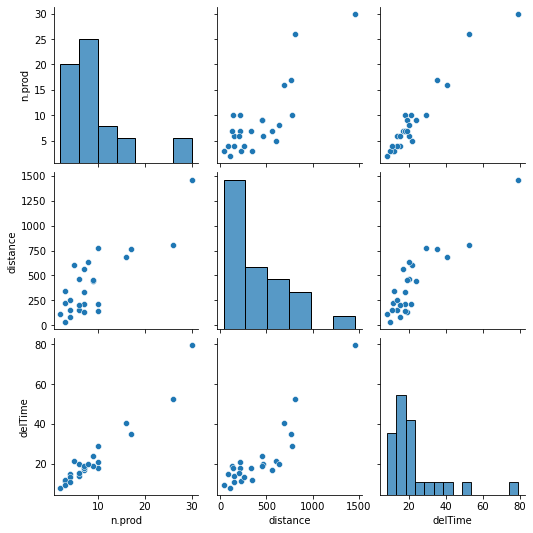

In [182]:
# Visualizing data
import seaborn as sns
sns.pairplot(delivery)

In [183]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression
# Instantiating the algorithm for building the model
model = LinearRegression()
# selecting the predictors and targets
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
# building the model using fit() method
model.fit(X,y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)
# Sample output for the above code
# Intercept: 2.3412311451922 
# Coefficients: [1.61590721 0.01438483]

Intercept: 2.3412311451922 
Coefficients: [1.61590721 0.01438483]


C:\Users\CS-L2-PC10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n.prod', ylabel='distance'>

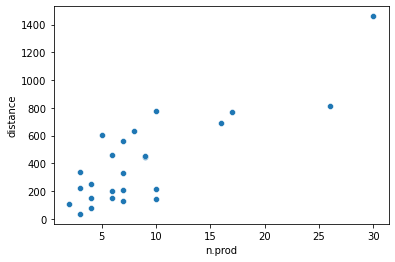

In [184]:
# fig,ax = plt.subplots()
# # Plotting the actual target values
# ax.scatter(x="n.prod",y="delTime",data=delivery) 
# # Plotting the target values predicted by the best fit model
# ax.plot(delivery.Units,computers.min_best_fit_model,color="red")

sns.scatterplot(delivery['n.prod'] , delivery['distance'])

In [185]:
# finding the correlation
np.corrcoef(delivery["n.prod"],delivery["distance"])
# correlation value derived - 0.824215

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [186]:
X.shape[1]

2

In [187]:
X.values

array([[   7,  560],
       [   3,  220],
       [   3,  340],
       [   4,   80],
       [   6,  150],
       [   7,  330],
       [   2,  110],
       [   7,  210],
       [  30, 1460],
       [   5,  605],
       [  16,  688],
       [  10,  215],
       [   4,  255],
       [   6,  462],
       [   9,  448],
       [  10,  776],
       [   6,  200],
       [   7,  132],
       [   3,   36],
       [  17,  770],
       [  10,  140],
       [  26,  810],
       [   9,  450],
       [   8,  635],
       [   4,  150]], dtype=int64)

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


In [189]:
#read data from input csv file
house_data = pd.read_csv("dataset/kc_house_data.csv")
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [190]:
house_data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [191]:
house_data_df = house_data[["price","date", "bedrooms", 
                                  "bathrooms", "sqft_living", "floors", 
                                  "waterfront", "view", "condition", "grade","zipcode"]]


In [192]:
# Extracting year and month from date
house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
house_data_df.loc[:,"month"] = house_data["date"].str[4:6]
#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])

C:\Users\CS-L2-PC10\AppData\Local\Temp\ipykernel_8016\3803139144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
C:\Users\CS-L2-PC10\AppData\Local\Temp\ipykernel_8016\3803139144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"month"] = house_data["date"].str[4:6]


In [193]:
# encoding categorical values
cat_features = ["waterfront", "view", "condition", "grade", "year", "month", "zipcode"]
house_data_df = pd.get_dummies(house_data_df,columns=cat_features)
print(house_data_df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)


In [194]:
#read data from input csv file
house_data = pd.read_csv("dataset/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [195]:
#Determine the size of the data
print(house_data.shape)
#output
#(21613, 21)

(21613, 21)


In [196]:
house_data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [197]:
house_data_df = house_data[["price","date", "bedrooms", 
                                  "bathrooms", "sqft_living", "floors", 
                                  "waterfront", "view", "condition", "grade","zipcode"]]


In [198]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [199]:
# Extracting year and month from date
house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
house_data_df.loc[:,"month"] = house_data["date"].str[4:6]
#removing date after this extraction
house_data_df = house_data_df.drop(columns=["date"])

C:\Users\CS-L2-PC10\AppData\Local\Temp\ipykernel_8016\3803139144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"year"] = house_data["date"].str[0:4]
C:\Users\CS-L2-PC10\AppData\Local\Temp\ipykernel_8016\3803139144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_df.loc[:,"month"] = house_data["date"].str[4:6]


In [200]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [201]:
x = pd.DataFrame(boston.iloc[:,[2,5,7,9]])
x

,INDUS,RM,DIS,TAX
0,2.31,6.575,4.0900,296
1,7.07,6.421,4.9671,242
2,7.07,7.185,4.9671,242
3,2.18,6.998,6.0622,222
4,2.18,7.147,6.0622,222
...,...,...,...,...
501,11.93,6.593,2.4786,273
502,11.93,6.120,2.2875,273
503,11.93,6.976,2.1675,273
504,11.93,6.794,2.3889,273


In [202]:
y = boston.iloc[: , -1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

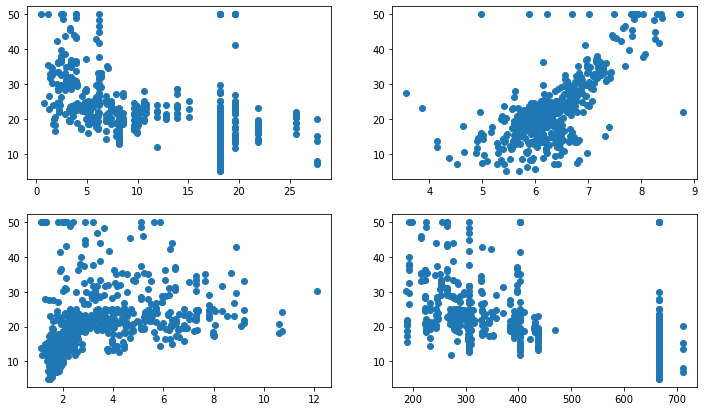

In [203]:
fig = plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.scatter(boston['INDUS']  , boston['MEDV'])

plt.subplot(2,2,2)
plt.scatter(boston['RM']  , boston['MEDV'])

plt.subplot(2,2,3)
plt.scatter(boston['DIS']  , boston['MEDV'])

plt.subplot(2,2,4)
plt.scatter(boston['TAX']  , boston['MEDV'])

In [204]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.33 , random_state=2)

In [205]:
lr.fit(x_train , y_train)

LinearRegression()

In [206]:
y_pred = lr.predict(x_test)

In [207]:
lr.intercept_

-11.59507837943261

In [208]:
lr.coef_

array([-0.26154632,  7.05177822, -0.58429454, -0.01240213])

In [209]:
mean_squared_error(y_test,y_pred)

31.913695302078402

In [210]:
lr.score(x_train , y_train)

0.5282461377797076

In [211]:
lr.score(x_test , y_test)

0.6411378526650199

In [212]:
# lr.score(y_test ,y_pred)

In [220]:
library(pysch)

NameError: name 'library' is not defined

In [219]:
np.summary(x_test)

AttributeError: module 'numpy' has no attribute 'summary'